# Технологическая практика

## Анализ данных html

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [1]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import re

In [2]:
wiki = "https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BC%D0%B8%D1%8F_%C2%AB%D0%9E%D1%81%D0%BA%D0%B0%D1%80%C2%BB_%D0%B7%D0%B0_%D0%BB%D1%83%D1%87%D1%88%D0%B8%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC#%D0%94%D0%BE%D1%81%D1%82%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%B4%D1%80%D1%83%D0%B3%D0%B8%D0%BC_%D0%BD%D0%BE%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D1%8F%D0%BC_%D0%9E%D1%81%D0%BA%D0%B0%D1%80%D0%B0"

resp = req.get(wiki)
soup = BeautifulSoup(resp.text, 'lxml')
res_table = soup.find_all('table', {'class' : 'wikitable'})

all_data = []
victory_data = []
for table in res_table:
	for tr in table.find_all('tr'):
		all_data.append(' '.join(tr.text.split('\n')))
	for tr in table.find_all('tr', {'style' : 'background:#FAEB86'}):
		victory_data.append(' '.join(tr.text.split('\n')))
	for td in filter(None,table.find_all('td', {'style' : 'background:#FAEB86'})):
		victory_data.append(td.text)

nomination = -1

for data in all_data:
	if re.findall(".*Стивен Спилберг.*",data):
		nomination += 1

W_B = 0
P_P = 0
for data in victory_data:
	if re.findall(".*Стивен Спилберг.*",data):
		nomination -= 1
	if re.findall(".*Paramount Pictures.*", data):
		P_P += 1
	if re.findall(".*Warner Bros.*", data):
		W_B += 1

victory = "Warner Bros." if max(P_P, W_B) == W_B else "Paramount Pictures"
print(f"Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга? {nomination}")
print(f"Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше? {victory}; {abs(W_B - P_P)}")

Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга? 9
Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше? Warner Bros.; 1


## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [3]:
wiki = "https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль"

resp = req.get(wiki)
soup = BeautifulSoup(resp.text, 'lxml')
res_table = soup.find_all('table', {'class' : 'wikitable'})

data_actress = []
for table in res_table:
	for tr in table.find_all('tr'):
		buf = filter(lambda x: False if re.findall(".*\d.*|Церемония|Фото лауреата|Актриса|Фильм|Роль", x) or x == "" else True, tr.text.split('\n'))
		data_actress.append(buf)

data_actress.pop(2)
data_actress.pop(2)

data_actress = pd.DataFrame(filter(None, data_actress), columns=["Actress", "Film", "Role"])
new = data_actress[~pd.isnull(data_actress).all(1)]
col_nom = dict.fromkeys(set(new['Actress']), 0)

for actress in new['Actress']:
	col_nom[actress] += 1

max_nom = max(col_nom.values())
second_nom = max(filter(lambda x: False if x == max_nom else True, col_nom.values()))
for key in col_nom:
	if col_nom[key] == max_nom:
		first_actress = key
	elif col_nom[key] == second_nom:
		second_actress = key

print(f"Какая актриса чаще всего номинировалась на Оскар? {first_actress}")
print(f"Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте? {col_nom[first_actress]-col_nom[second_actress]}")

Какая актриса чаще всего номинировалась на Оскар? • Мерил Стрип
Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте? 5


## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

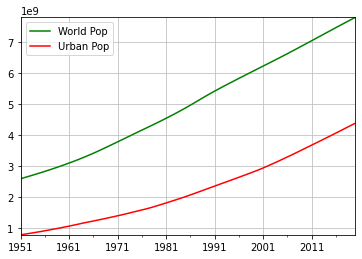

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

wiki = "https://www.worldometers.info/world-population/world-population-by-year/"

resp = req.get(wiki)
soup = BeautifulSoup(resp.text, 'lxml')
table = soup.find_all('tbody')

data = []
for tr in table[0].find_all('tr'):
	data.append([td.text for td in tr.find_all('td')])

data = pd.DataFrame(data, columns=["Year", "World Population", "Yearly Change", "Net Change", "Density(P/Km²)", "Urban Pop", "Urban Pop %"])
index = data.index[data.Year == '1951']

x_world = data["Year"][:index[0]+1][::-1]
y_world = [int(''.join(i.split(','))) for i in data["World Population"]][:index[0]+1][::-1]

y_urban = []
for i in data["Urban Pop"]:
	try:
		y_urban.append(int(''.join(re.findall("\d*", i))))
	except:
		pass
y_urban.reverse()

fig, ax = plt.subplots()

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.plot(x_world, y_world, 'g', label='World Pop')
ax.plot(x_world, y_urban, 'r', label='Urban Pop')
ax.legend()
plt.autoscale(tight=True)
# Рисуем сетку пунктиром
plt.grid(True, linestyle='-', color='0.75')
plt.show()